In [20]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_8056/2889067548.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


pip install --upgrade torchvision


# Import and process the data

In [21]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)


2.4.1
0.19.1


In [22]:
# Importing Required Libraries

# Import the MNIST dataset from torchvision
import torchvision

# Import numpy for data manipulation
import numpy as np

# Load the MNIST dataset and download it if necessary
MNIST = torchvision.datasets.MNIST(".", download=True)

# Extract the training data, training labels, test data, and test labels from the MNIST dataset
train_data = MNIST.train_data
train_labels = MNIST.train_labels
test_data = MNIST.test_data
test_labels = MNIST.test_labels

# Combining and Subsampling Data

# Vertically combine the training and test data arrays
data = np.vstack([train_data, test_data])

# Vertically combine the training and test labels arrays
labels = np.hstack([train_labels, test_labels])

# Set a random seed for reproducibility
np.random.seed(42)

# Randomly select 20,000 samples from the combined data without replacement
indices = np.random.choice(len(data), size=20000, replace=False)

# Update the 'data' array to include only the selected samples
data = data[indices]

# Update the 'labels' array to include only the labels corresponding to the selected samples
labels = labels[indices]

# Reshape the 'data' array to ensure it is a 2D array
data = data.reshape(data.shape[0], -1)

# Explanation:
# This code imports the MNIST dataset using torchvision and extracts the training and test data along with their labels.
# It then vertically combines the training and test data arrays, as well as the labels arrays, to create a larger dataset.
# Randomly, 20,000 samples are selected from the combined dataset without replacement to reduce its size.
# Finally, both the 'data' and 'labels' arrays are reshaped into 2D arrays, which is a common format for input to machine learning models.


In [23]:
labels=labels.reshape(20000,1)

In [24]:
labels

array([[6],
       [8],
       [7],
       ...,
       [2],
       [1],
       [8]])

In [25]:
data = np.concatenate((labels, data),axis=1)

In [26]:
# import dataset (comes with colab!)
#data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# extract labels (number IDs) and remove from data
labels = data[:,0]
data   = data[:,1:]

In [27]:
sum(data.flatten()>0)

2993979

In [28]:
sum(data.flatten()>0)/sum(data.flatten())*100

0.5738200229852755

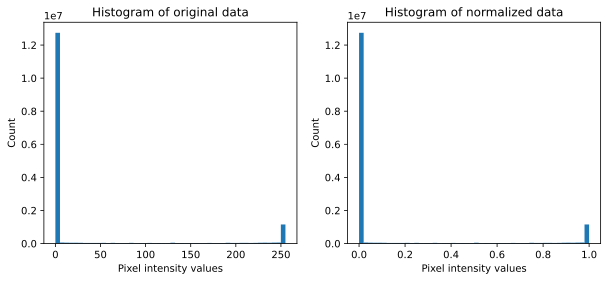

In [29]:
# Normalizing Data to [0, 1] Range and Visualizing Histograms

# Normalize the data to a range of [0, 1] X_NORM=(X-XMIN)/(XMAX-XMIN)
dataNorm = data / np.max(data)

# Create a figure with two subplots for visualizing histograms 
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram of original data
ax[0].hist(data.flatten(), 50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')

# Plot the histogram of normalized data
ax[1].hist(dataNorm.flatten(), 50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

# Display the figure
plt.show()

# Explanation:
# In this code, we perform data normalization and visualize histograms of the original and normalized data:
# - We normalize the data by dividing it by the maximum pixel intensity value to ensure that all values are in the range [0, 1].
# - We create a figure with two subplots using `plt.subplots(1, 2, figsize=(10, 4))`, which allows us to compare histograms side by side.
# - In the first subplot (ax[0]), we plot the histogram of the original data using `ax[0].hist()`.
# - In the second subplot (ax[1]), we plot the histogram of the normalized data using `ax[1].hist()`.
# - We set labels, titles, and adjust the number of bins in the histograms for clarity.
# - Finally, we use `plt.show()` to display the figure with the histograms.
# This code helps us visualize the pixel intensity distributions before and after normalization.


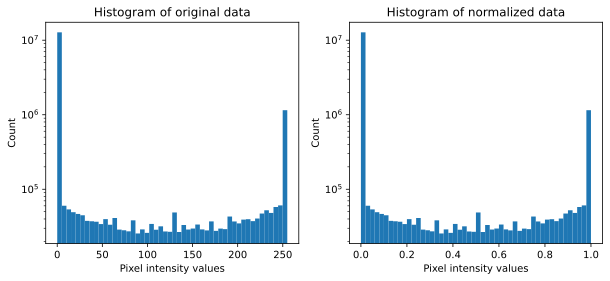

In [43]:
# Normalizing Data to [0, 1] Range and Visualizing Histograms

# Normalize the data to a range of [0, 1]
dataNorm = data / np.max(data)

# Create a figure with two subplots for visualizing histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram of original data
ax[0].hist(data.flatten(), 50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')
ax[0].set_yscale('log')
# Plot the histogram of normalized data
ax[1].hist(dataNorm.flatten(), 50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')
ax[1].set_yscale('log')

# Display the figure
plt.show()

# Explanation:
# In this code, we perform data normalization and visualize histograms of the original and normalized data:
# - We normalize the data by dividing it by the maximum pixel intensity value to ensure that all values are in the range [0, 1].
# - We create a figure with two subplots using `plt.subplots(1, 2, figsize=(10, 4))`, which allows us to compare histograms side by side.
# - In the first subplot (ax[0]), we plot the histogram of the original data using `ax[0].hist()`.
# - In the second subplot (ax[1]), we plot the histogram of the normalized data using `ax[1].hist()`.
# - We set labels, titles, and adjust the number of bins in the histograms for clarity.
# - Finally, we use `plt.show()` to display the figure with the histograms.
# This code helps us visualize the pixel intensity distributions before and after normalization.


# Create train/test groups using DataLoader

In [31]:
# Step 1: convert to tensor
dataT   = torch.tensor( dataNorm ).float()
labelsT = torch.tensor( labels ).long() # long = int64

# Step 2: use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)


# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [32]:
# Checking Variables in Workspace

# Use the %whos magic command to list all variables in the workspace
%whos

# Explanation:
# In this code, we utilize a Jupyter Notebook magic command, "%whos," to display a list of all variables currently present in the workspace.
# The "%whos" command provides information about each variable, including its name, type, and memory usage. This is useful for inspecting the variables available during interactive data analysis or debugging.


Variable                 Type             Data/Info
---------------------------------------------------
DataLoader               type             <class 'torch.utils.data.dataloader.DataLoader'>
F                        module           <module 'torch.nn.functio<...>/torch/nn/functional.py'>
MNIST                    MNIST            Dataset MNIST\n    Number<...>tion: .\n    Split: Train
TensorDataset            type             <class 'torch.utils.data.dataset.TensorDataset'>
X                        Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
ax                       ndarray          2: 2 elems, type `object`, 16 bytes
batchsize                int              32
createTheMNISTNet        function         <function createTheMNISTNet at 0x7f3feb5e0fe0>
data                     ndarray          20000x784: 15680000 elems, type `int64`, 125440000 bytes (119.62890625 Mb)
dataNorm                 ndarray          20000x784: 15680000 elems, type `float64`, 125440

# Create the DL model

In [33]:
# Creating a Neural Network Model for MNIST

# Define a function to create the MNIST neural network model
def createTheMNISTNet():
  
  # Define a class for the model
  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### Input layer
      self.input = nn.Linear(784, 64)  # Fully connected layer with 784 input features and 64 output features
      
      ### Hidden layers
      self.fc1 = nn.Linear(64, 32)    # First hidden layer with 64 input features and 32 output features
      self.fc2 = nn.Linear(32, 32)    # Second hidden layer with 32 input features and 32 output features

      ### Output layer
      self.output = nn.Linear(32, 10)  # Fully connected output layer with 32 input features and 10 output features representing class probabilities

    # Forward pass
    def forward(self, x):
      x = F.relu(self.input(x))  # Apply ReLU activation to the input layer
      x = F.relu(self.fc1(x))    # Apply ReLU activation to the first hidden layer
      x = F.relu(self.fc2(x))    # Apply ReLU activation to the second hidden layer
      return torch.log_softmax(self.output(x), axis=1)  # Apply log-softmax activation to the output layer, returning log probabilities
      
  # Create an instance of the model
  net = mnistNet()
  
  # Define the loss function (Negative Log Likelihood Loss)
  lossfun = nn.NLLLoss()

  # Define the optimizer (Stochastic Gradient Descent)
  optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

  return net, lossfun, optimizer

# Explanation:
# This code defines a neural network model for the MNIST dataset using PyTorch.
# The model consists of an input layer with 784 input features (representing a flattened 28x28 pixel image), two hidden layers with ReLU activation functions, and an output layer with 10 output features representing class probabilities for digits 0 to 9.
# The forward pass of the model applies ReLU activation functions to the input and hidden layers and uses log-softmax activation for the output layer.
# The loss function is defined as Negative Log Likelihood Loss (NLLLoss), and the optimizer is set as Stochastic Gradient Descent (SGD) with a learning rate of 0.01.
# This model is suitable for classifying hand-written digits in the MNIST dataset.


In [34]:
# test the model with one batch
net,lossfun,optimizer = createTheMNISTNet()

X,y = next(iter(train_loader))
yHat = net(X)

# values are log-probability of each number (0-9)
# print(torch.exp(yHat))

# now let's compute the loss
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

 
Loss:
tensor(2.3186, grad_fn=<NllLossBackward0>)


In [35]:
yHat

tensor([[-2.2846, -2.3812, -2.2269, -2.2208, -2.2902, -2.2339, -2.1046, -2.4443,
         -2.4613, -2.4418],
        [-2.2906, -2.3829, -2.2289, -2.2170, -2.2836, -2.2332, -2.0993, -2.4434,
         -2.4632, -2.4506],
        [-2.2863, -2.3756, -2.2225, -2.2178, -2.2939, -2.2386, -2.1081, -2.4352,
         -2.4693, -2.4416],
        [-2.2785, -2.3798, -2.2241, -2.2258, -2.2914, -2.2354, -2.1134, -2.4401,
         -2.4709, -2.4272],
        [-2.2959, -2.3832, -2.2290, -2.2222, -2.2771, -2.2332, -2.0898, -2.4483,
         -2.4640, -2.4527],
        [-2.2913, -2.3825, -2.2297, -2.2232, -2.2899, -2.2314, -2.0980, -2.4475,
         -2.4606, -2.4365],
        [-2.2917, -2.3829, -2.2284, -2.2176, -2.2824, -2.2327, -2.0966, -2.4428,
         -2.4658, -2.4527],
        [-2.2736, -2.3827, -2.2207, -2.2194, -2.2831, -2.2435, -2.1086, -2.4306,
         -2.4818, -2.4473],
        [-2.2944, -2.3868, -2.2381, -2.2240, -2.2878, -2.2262, -2.0989, -2.4438,
         -2.4586, -2.4303],
        [-2.2889, -

# Create a function that trains the model

In [36]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 60
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


# Run the model and show the results!

In [37]:
trainAcc,testAcc,losses,net = function2trainTheModel()


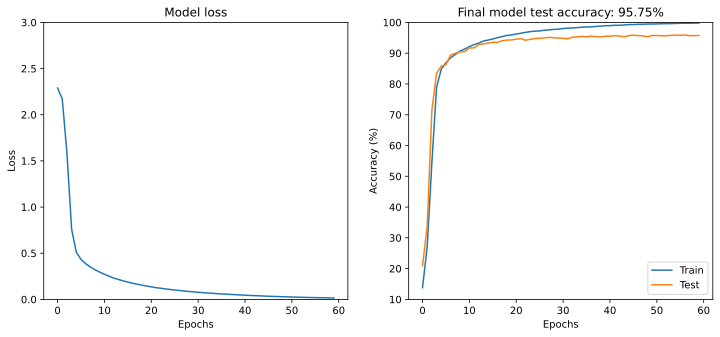

In [38]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

# Inspect the results in more detail

In [39]:
# run the model through for the test data
X,y = next(iter(test_loader))
predictions = net(X).detach()
# 
# predictions
# torch.exp(predictions)

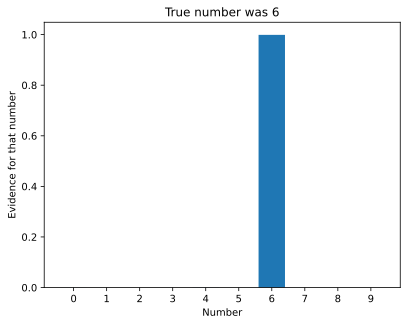

In [40]:
# Visualizing Evidence for All Numbers from One Sample

# Choose a specific sample to visualize its evidence
sample2show = 140

# Create a bar chart to display the evidence for each digit (0 to 9) from the predictions
plt.bar(range(10), torch.exp(predictions[sample2show]))  # Bar chart with x-axis representing numbers and y-axis representing the evidence
plt.xticks(range(10))  # Set x-axis ticks for each digit (0 to 9)
plt.xlabel('Number')  # Label for the x-axis
plt.ylabel('Evidence for that number')  # Label for the y-axis
plt.title('True number was %s' % y[sample2show].item())  # Title of the plot indicating the true number of the selected sample
plt.show()

# Explanation:
# This code generates a bar chart to visualize the evidence for each digit (0 to 9) from the predictions of a machine learning model.
# The variable 'sample2show' specifies the index of the sample for which we want to display the evidence.
# The 'predictions' variable contains the model's predicted probabilities for each digit, and 'y' contains the true labels for the samples.
# The bar chart has digits (0 to 9) on the x-axis and the corresponding evidence values on the y-axis.
# The title of the plot indicates the true number of the selected sample, and the bar heights represent the evidence for each digit.


[   2   12   16   46  108  126  153  186  198  206  291  292  335  357
  362  372  427  436  477  496  507  562  577  581  619  655  671  725
  741  796  798  808  815  823  827  851  861  878  882  891  920  930
  966  968  989 1024 1032 1045 1051 1055 1057 1075 1154 1156 1176 1190
 1192 1228 1234 1257 1263 1323 1362 1382 1453 1463 1535 1571 1591 1638
 1641 1650 1653 1703 1746 1750 1767 1785 1792 1866 1887 1894 1969 1975
 1984]


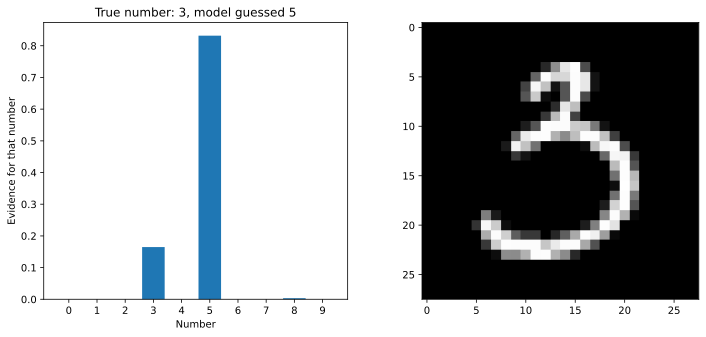

In [41]:
# Find Errors and Visualize Evidence for One Sample

# Find the indices of errors where the predicted class does not match the true class
errors = np.where(torch.max(predictions, axis=1)[1] != y)[0]
print(errors)

# Choose a specific error to visualize
sample2show = 10

# Create a subplot with two plots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the evidence for each digit based on model predictions
ax[0].bar(range(10), np.exp(predictions[errors[sample2show]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title('True number: %s, model guessed %s' %
                (y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item()))

# Display the image corresponding to the error
ax[1].imshow(np.reshape(X[errors[sample2show], :], (28, 28)), cmap='gray')

plt.show()

# Explanation:
# This code first finds and prints the indices of errors where the model's predicted class differs from the true class.
# Then, it selects a specific error to visualize using the variable 'sample2show'.
# In the subplot, the left plot (ax[0]) shows the evidence for each digit (0 to 9) based on the model's predictions.
# The x-axis represents numbers, the y-axis represents the evidence, and the title indicates the true number and the model's guess for that error.
# The right plot (ax[1]) displays the image corresponding to the error, allowing us to examine the misclassified sample.


# Additional explorations

In [42]:
# 1) Average together the correct 7's and the error 7's, and make images of them (that is, one image
#    of all correct 7's and one image of all incorrectly labeled 7's). How do they look?
# 
# 2) Repeat #1 for all numbers to produce a 2x10 matrix of images with corrects on top
#    and errors on the bottom.
# 
# 3) Identify "almost errors," which we can define as correct categorizations that had a probability of
#    e.g., >.1 for any other number. Make images of some of these numbers. Can you understand why the model
#    was confused?
# 
# 4) I didn't use .train(), .eval(), or no_grad() here. Is that a problem? Can you add those in without checking
#    other notebooks?
# 